Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

In [15]:
#Import all necessary modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [16]:
#load the data
flights = pd.read_csv("data/time_fixedrow.csv")
passengers = pd.read_csv('data/passengers.csv')
passengers.drop('Unnamed: 0',axis=1,inplace=True)

In [18]:
passengers.head()

,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,dest_country,dest_country_name,aircraft_group,aircraft_type,aircraft_config,year,month,distance_group,class,data_source
0,0.0,1.0,97100.0,246.0,157.0,0.0,0.0,792.0,111.0,102.0,...,US,United States,6,624,1,2015,1,2,L,DU
1,53.0,53.0,1833800.0,7579.0,6235.0,7356.0,0.0,1123.0,9854.0,8673.0,...,US,United States,6,612,1,2017,3,3,F,DU
2,31.0,31.0,1103600.0,5518.0,3956.0,0.0,0.0,407.0,2530.0,1982.0,...,US,United States,6,694,1,2015,3,1,F,DU
3,4.0,4.0,486920.0,0.0,0.0,242936.0,1946.0,306.0,279.0,193.0,...,US,United States,6,691,2,2016,7,1,G,DU
4,0.0,10.0,22000.0,80.0,24.0,71.0,1553.0,61.0,291.0,220.0,...,US,United States,1,194,1,2016,7,1,F,DU


In [19]:
airports_origin = pd.DataFrame(
    flights.groupby(['origin','origin_city_name'])['fl_date'].count().reset_index()
).rename({'fl_date': 'flight_count'}, axis=1)


airports_destination = pd.DataFrame(
    flights.groupby(['dest','dest_city_name'])['fl_date'].count().reset_index()
).rename({'fl_date': 'flight_count'}, axis=1)

In [20]:
airports_origin = airports_origin.sort_values(by='flight_count', ascending=False)[:10]
airports_destination = airports_destination.sort_values(by='flight_count', ascending=False)[:10]

In [21]:
airports_origin['id, city'] = airports_origin[['origin','origin_city_name']].agg(', '.join, axis=1)
airports_destination['id, city'] = airports_destination[['dest','dest_city_name']].agg(', '.join, axis=1)

In [22]:
passengers_airports_origin = pd.DataFrame(
                passengers.groupby(['origin','origin_city_name'])['passengers']
                .sum().reset_index()
).rename({'passengers': 'total_passengers'}, axis=1)

passengers_airports_origin = passengers_airports_origin.sort_values(by='total_passengers', ascending=False)[:10]


passengers_airports_destination = pd.DataFrame(
    passengers.groupby(['dest','dest_city_name'])['passengers']
    .sum().reset_index()
).rename({'passengers': 'total_passengers'}, axis=1)

passengers_airports_destination = passengers_airports_destination.sort_values(by='total_passengers', ascending=False)[:10]

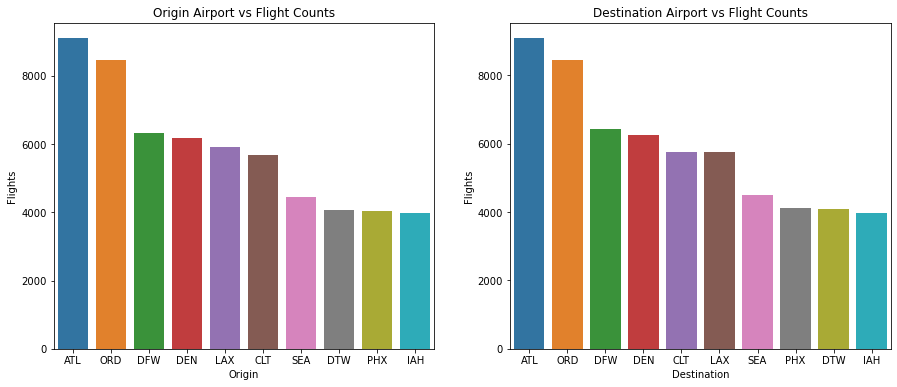

In [28]:
f, axes = plt.subplots(1, 2, figsize=(15,6))

ax1 = sns.barplot(x='origin', y='flight_count', data=airports_origin, ax=axes[0])
ax2 = sns.barplot(x='dest', y='flight_count', data=airports_destination, ax=axes[1])

ax1.set(title='Origin Airport vs Flight Counts', xlabel='Origin', ylabel='Flights')
ax2.set(title='Destination Airport vs Flight Counts', xlabel='Destination', ylabel='Flights');

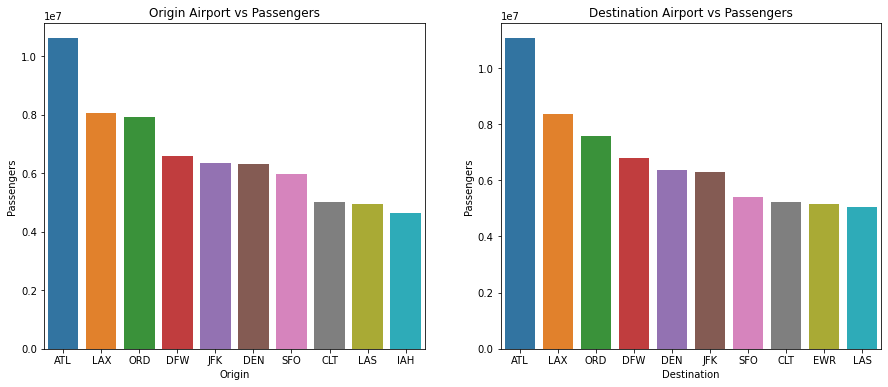

In [24]:
f, axes = plt.subplots(1, 2, figsize=(15,6))

ax1 = sns.barplot(x='origin', y='total_passengers', data=passengers_airports_origin, ax=axes[0])
ax2 = sns.barplot(x='dest', y='total_passengers', data=passengers_airports_destination, ax=axes[1])

ax1.set(title='Origin Airport vs Passengers', xlabel='Origin', ylabel='Passengers')
ax2.set(title='Destination Airport vs Passengers', xlabel='Destination', ylabel='Passengers');

In [25]:
passengers_airports_origin

,origin,origin_city_name,total_passengers
91,ATL,"Atlanta, GA",10622155.0
701,LAX,"Los Angeles, CA",8075111.0
934,ORD,"Chicago, IL",7922830.0
318,DFW,"Dallas/Fort Worth, TX",6603386.0
613,JFK,"New York, NY",6353879.0
317,DEN,"Denver, CO",6321739.0
1139,SFO,"San Francisco, CA",5985109.0
252,CLT,"Charlotte, NC",5017158.0
699,LAS,"Las Vegas, NV",4957960.0
572,IAH,"Houston, TX",4637925.0


In [26]:
pd.merge(airports_origin,passengers_airports_origin,how = "outer", on = "origin")

,origin,origin_city_name_x,flight_count,"id, city",origin_city_name_y,total_passengers
0,ATL,"Atlanta, GA",9099.0,"ATL, Atlanta, GA","Atlanta, GA",10622155.0
1,ORD,"Chicago, IL",8468.0,"ORD, Chicago, IL","Chicago, IL",7922830.0
2,DFW,"Dallas/Fort Worth, TX",6326.0,"DFW, Dallas/Fort Worth, TX","Dallas/Fort Worth, TX",6603386.0
3,DEN,"Denver, CO",6181.0,"DEN, Denver, CO","Denver, CO",6321739.0
4,LAX,"Los Angeles, CA",5922.0,"LAX, Los Angeles, CA","Los Angeles, CA",8075111.0
5,CLT,"Charlotte, NC",5678.0,"CLT, Charlotte, NC","Charlotte, NC",5017158.0
6,SEA,"Seattle, WA",4440.0,"SEA, Seattle, WA",NaN,NaN
7,DTW,"Detroit, MI",4069.0,"DTW, Detroit, MI",NaN,NaN
8,PHX,"Phoenix, AZ",4028.0,"PHX, Phoenix, AZ",NaN,NaN
9,IAH,"Houston, TX",3988.0,"IAH, Houston, TX","Houston, TX",4637925.0
